# <span style="color:blue">CRM CASE</span>

## Machine Learning Part 3

### Logistic Regression

In [48]:
from sql import get_ml3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as sm
from sklearn.metrics import classification_report

In [3]:
data = get_ml3()

database successfully connected


In [4]:
data.head()

,customer_id,TotalSales,OrderCount,AvgOrderValue,Target
0,3338,4.23,1,4.230,0
1,3427,62.04,1,62.040,0
2,3837,14.28,1,14.280,0
3,3910,39.57,2,19.785,0
4,31229,702.54,1,702.540,1


Feature Selection

In [30]:
features = ['OrderCount', 'TotalSales']
X = data[features]
y = data['Target']

In [31]:
X.head()

,OrderCount,TotalSales
0,1,4.23
1,1,62.04
2,1,14.28
3,2,39.57
4,1,702.54


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

feature scaling

In [33]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

linear_model

In [34]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

Test: 4923
Train: 14769

In [36]:
confusion_matrix(y_test, y_pred)

array([[4280,   23],
       [ 473,  147]])

linear line because of linear model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


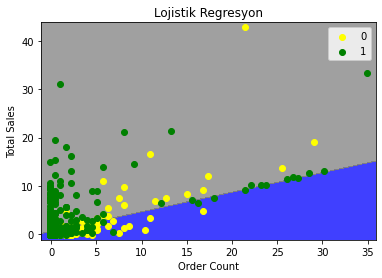

In [40]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)
plt.contourf(
     X1,
     X2,
     classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.75,
     cmap = ListedColormap(('blue', 'gray'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(
          X_set[y_set == j, 0], X_set[y_set == j, 1],
          c = ListedColormap(('yellow', 'green'))(i), label = j
     )
plt.title('Lojistik Regresyon')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


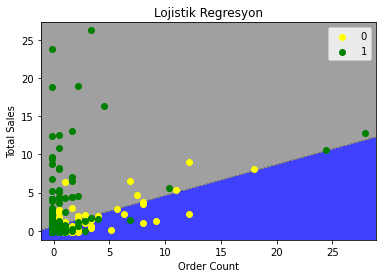

In [41]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)
plt.contourf(
     X1,
     X2,
     classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.75,
     cmap = ListedColormap(('blue', 'gray'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(
          X_set[y_set == j, 0], X_set[y_set == j, 1],
          c = ListedColormap(('yellow', 'green'))(i), label = j
     )
plt.title('Lojistik Regresyon')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [43]:
sm.accuracy_score(y_test, y_pred)

0.8992484257566524

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      4303
           1       0.86      0.24      0.37       620

    accuracy                           0.90      4923
   macro avg       0.88      0.62      0.66      4923
weighted avg       0.90      0.90      0.87      4923

